# Star Wars Survey

---

## 1. Introduction

While waiting for [Star Wars](https://en.wikipedia.org/wiki/Star_Wars): The Force Awakens to come out, the team at [FiveThirtyEight](http://fivethirtyeight.com/) became interested in answering some questions about Star Wars fans. They surveyed Star Wars fans using the online tool SurveyMonkey and received 835 total responses, which can be found in their [Github repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

We will clean and explore the dataset to determine:

- **Which is the best film in the series?**
- **Who are the most liked and disliked characters in the series?**

---

## 2. Explore and Clean the Data

**a. Open and read the data**

The data has several columns, including the following:

| Column | Description | 
| - | - |
| `RespondentID` | An anonymized ID for the respondent |
| `Gender` | The respondent's gender |
| `Age` | The respondent's age |
| `Household Income` | The respondent's income |
| `Education` | The respondent's education level |
| `Location (Census Region)` | The respondent's location |
| `Have you seen any of the 6 films in the Star Wars franchise?` | A `Yes` or `No` response |
| `Do you consider yourself to be a fan of the Star Wars film franchise? ` | A `Yes` or `No` response |

There are several other columns containing answers to questions about the Star Wars movies. For some questions, the respondent had to check one or more boxes. This type of data is difficult to represent in a column. As a result, this dataset needs to be cleaned.

Firstly, we will specify an encoding to open and read the data, because the dataset has some characters that aren't in Python's default utf-8 encoding.

In [1]:
import pandas as pd

# Read with ISO-8859-1 encoding
star_wars = pd.read_csv('star_wars.csv', encoding = 'ISO-8859-1')

# Inspect values in first few rows
print('First 10 rows from star_wars:')
star_wars.head(10)

First 10 rows from star_wars:


,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1.0,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
6,3292684787,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6.0,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
7,3292663732,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
8,3292654043,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
9,3292640424,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1.0,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific

In [2]:
# Review the column names
print('The column names are:')
print([_ for _ in star_wars.columns])

The column names are:
['RespondentID', 'Have you seen any of the 6 films in the Star Wars franchise?', 'Do you consider yourself to be a fan of the Star Wars film franchise?', 'Which of the following Star Wars films have you seen? Please select all that apply.', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Which character shot first?', 'Are you familiar with the Expanded Universe?', 'Do you consider yourself to be a fan of the Expanded Unive

**b. Convert columns containing Yes/No responses**

These columns represent Yes/No questions:
- `Have you seen any of the 6 films in the Star Wars franchise?`
- `Do you consider yourself to be a fan of the Star Wars film franchise?`

They can also have null (`NaN`) where a respondent chooses not to answer a question. 

Both columns are currently string types, because the main values they contain are `Yes` and `No`. We can convert each column to a Boolean with only the values `True`, `False` and `NaN`, so that we can easily calculate the number of times each value appears.

In [3]:
# Mapping dictionary
yes_no = {"Yes": True, "No": False}

yes_no_cols = ['Have you seen any of the 6 films in the Star Wars franchise?', 
              'Do you consider yourself to be a fan of the Star Wars film franchise?']

for col in yes_no_cols:
    # Convert yes/no responses to Boolean
    star_wars[col] = star_wars[col].map(yes_no)
    
    # Verify that the columns only contain the value True, False, or NaN
    print(f'The values in {col} column have been converted to:')
    print(star_wars[col].unique())

The values in Have you seen any of the 6 films in the Star Wars franchise? column have been converted to:
[ True False]
The values in Do you consider yourself to be a fan of the Star Wars film franchise? column have been converted to:
[True nan False]


**c. Convert columns containing checkbox responses**

The next few columns represent a single checkbox question. 

For the six columns below, the respondent checked off a series of boxes in response to the question `Which of the following Star Wars films have you seen? Please select all that apply.`:

| Column | Description |
| - | - | 
| `Which of the following Star Wars films have you seen? Please select all that apply.` | Whether or not the respondent saw Star Wars: Episode I The Phantom Menace |
| `Unnamed: 4` | Whether or not the respondent saw `Star Wars: Episode II Attack of the Clones` |
| `Unnamed: 5` | Whether or not the respondent saw `Star Wars: Episode III Revenge of the Sith` |
| `Unnamed: 6` | Whether or not the respondent saw `Star Wars: Episode IV A New Hope` |
| `Unnamed: 7` | Whether or not the respondent saw `Star Wars: Episode V The Empire Strikes Back` |
| `Unnamed: 8` | Whether or not the respondent saw `Star Wars: Episode VI Return of the Jedi` |

- If the value in a cell is the name of the movie, that means the respondent saw the movie. 
- If the value is `NaN`, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie.

We will convert each column to Boolean values and rename the column to something more intuitive.

In [4]:
import numpy as np

# Rename columns
seen_cols = {'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1',
            'Unnamed: 4': 'seen_2',
            'Unnamed: 5': 'seen_3',
            'Unnamed: 6': 'seen_4',
            'Unnamed: 7': 'seen_5',
            'Unnamed: 8': 'seen_6'}
star_wars = star_wars.rename(columns = seen_cols)

# Mapping dictionary for values in column

true_false = {'Star Wars: Episode I  The Phantom Menace': True, 
              'Star Wars: Episode II  Attack of the Clones': True,
              'Star Wars: Episode III  Revenge of the Sith': True, 
              'Star Wars: Episode IV  A New Hope': True, 
              'Star Wars: Episode V The Empire Strikes Back': True, 
              'Star Wars: Episode VI Return of the Jedi': True, 
              np.NaN: False}

for col in star_wars.columns[3:9]:
    # Convert responses to Boolean
    star_wars[col] = star_wars[col].map(true_false)

    # Verify column names and values
    print(f'The values in {col} column have been converted to:')
    print(star_wars[col].unique())

The values in seen_1 column have been converted to:
[ True False]
The values in seen_2 column have been converted to:
[ True False]
The values in seen_3 column have been converted to:
[ True False]
The values in seen_4 column have been converted to:
[ True False]
The values in seen_5 column have been converted to:
[ True False]
The values in seen_6 column have been converted to:
[ True False]


**d. Convert columns containing numeric responses**

The next six columns ask the respondent to rank the Star Wars movies in order from least to most favorite:

| Column | Description |
| - | - |
| `Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.` | How much the respondent liked Star Wars: Episode I The Phantom Menace |
| `Unnamed: 10` | How much the respondent liked Star Wars: Episode II Attack of the Clones |
| `Unnamed: 11` | How much the respondent liked Star Wars: Episode III Revenge of the Sith |
| `Unnamed: 12` | How much the respondent liked Star Wars: Episode IV A New Hope |
| `Unnamed: 13` | How much the respondent liked Star Wars: Episode V The Empire Strikes Back |
| `Unnamed: 14` | How much the respondent liked Star Wars: Episode VI Return of the Jedi |

Each of the following columns can contain the value `1`, `2`, `3`, `4`, `5`, `6` or `NaN`. `1` means the film was the most favorite and `6` means it was the least favorite. 

We will convert each column to a numeric type, then rename the columns for clarity.

In [5]:
# Convert columns to float
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

# Rename columns
rank_cols = {
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_1',
    'Unnamed: 10': 'ranking_2',
    'Unnamed: 11': 'ranking_3',
    'Unnamed: 12': 'ranking_4',
    'Unnamed: 13': 'ranking_5',
    'Unnamed: 14': 'ranking_6'
}
star_wars = star_wars.rename(columns = rank_cols)

# Verify that the column names and values
star_wars[star_wars.columns[9:15]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ranking_1  835 non-null    float64
 1   ranking_2  836 non-null    float64
 2   ranking_3  835 non-null    float64
 3   ranking_4  836 non-null    float64
 4   ranking_5  836 non-null    float64
 5   ranking_6  836 non-null    float64
dtypes: float64(6)
memory usage: 55.7 KB


**e. Convert columns containing responses to different characters**

In addition, for the columns below, the respondent checked off a series of boxes in response to the question `Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.`:

| Column | Description |
| - | - | 
| `Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.` | Whether the respondent viewed `Han Solo` favorably |
| `Unnamed: 16` | Whether the respondent viewed `Luke Skywalker` favorably |
| `Unnamed: 17` | Whether the respondent viewed `Princess Leia Organa` favorably |
| `Unnamed: 18` | Whether the respondent viewed `Anakin Skywalker` favorably |
| `Unnamed: 19` | Whether the respondent viewed `Obi Wan Kenobi` favorably |
| `Unnamed: 20` | Whether the respondent viewed `Emperor Palpatine` favorably |
| `Unnamed: 21` | Whether the respondent viewed `Darth Vader` favorably |
| `Unnamed: 22` | Whether the respondent viewed `Lando Calrissian` favorably |
| `Unnamed: 23` | Whether the respondent viewed `Boba Fett` favorably |
| `Unnamed: 24` | Whether the respondent viewed `C-3P0` favorably |
| `Unnamed: 25` | Whether the respondent viewed `R2 D2` favorably |
| `Unnamed: 26` | Whether the respondent viewed `Jar Jar Binks` favorably |
| `Unnamed: 27` | Whether the respondent viewed `Padme Amidala` favorably |
| `Unnamed: 28` | Whether the respondent viewed `Yoda` favorably |

We will rename each column to correspond with the character name. To facilitate subsequent computation and analysis, we will convert the following text responses to numerical values:

| Response | Ranking |
| - | - |
| `Very favorably` | `5` |
| `Somewhat favorably` | `4` |
| `Neither favorably nor unfavorably (neutral)` | `3` |
| `Unfamiliar (N/A)` | `2` |
| `Somewhat unfavorably` | `1` | 
| `Very unfavorably` | `0`|

In [6]:
char_cols = {
    'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.': 'Han Solo',
    'Unnamed: 16': 'Luke Skywalker',
    'Unnamed: 17': 'Princess Leia Organa',
    'Unnamed: 18': 'Anakin Skywalker',
    'Unnamed: 19': 'Obi Wan Kenobi',
    'Unnamed: 20': 'Emperor Palpatine',
    'Unnamed: 21': 'Darth Vader',
    'Unnamed: 22': 'Lando Calrissian',
    'Unnamed: 23': 'Boba Fett',
    'Unnamed: 24': 'C-3P0',
    'Unnamed: 25': 'R2 D2',
    'Unnamed: 26': 'Jar Jar Binks',
    'Unnamed: 27': 'Padme Amidala',
    'Unnamed: 28': 'Yoda'
}

star_wars.rename(columns = char_cols, inplace = True)

char_responses = {'Very favorably' : 5, 
                  'Somewhat favorably': 4, 
                  'Neither favorably nor unfavorably (neutral)' : 3,
                  'Unfamiliar (N/A)': 2,
                  'Somewhat unfavorably': 1,
                  'Very unfavorably': 0}

for col in star_wars.columns[15:29]:
    # Convert responses to numerical ranking
    star_wars[col] = star_wars[col].map(char_responses)

    # Verify column names and values
    print(f'The values in {col} column have been converted to:')
    print(star_wars[col].unique())

The values in Han Solo column have been converted to:
[ 5. nan  4.  3.  1.  2.  0.]
The values in Luke Skywalker column have been converted to:
[ 5. nan  4.  1.  3.  0.  2.]
The values in Princess Leia Organa column have been converted to:
[ 5. nan  4.  1.  3.  0.  2.]
The values in Anakin Skywalker column have been converted to:
[ 5. nan  4.  1.  3.  0.  2.]
The values in Obi Wan Kenobi column have been converted to:
[ 5. nan  4.  0.  3.  1.  2.]
The values in Emperor Palpatine column have been converted to:
[ 5. nan  2.  4.  0.  3.  1.]
The values in Darth Vader column have been converted to:
[ 5. nan  2.  4.  1.  0.  3.]
The values in Lando Calrissian column have been converted to:
[ 2. nan  4.  3.  5.  1.  0.]
The values in Boba Fett column have been converted to:
[ 2. nan  1.  5.  4.  3.  0.]
The values in C-3P0 column have been converted to:
[ 5. nan  2.  4.  3.  1.  0.]
The values in R2 D2 column have been converted to:
[ 5. nan  2.  4.  3.  1.  0.]
The values in Jar Jar Binks c

## 3. Analyze the Data

**a. Which is the best film in the series?**

Now that the dataset is cleaned up, we can find the highest ranked movie in the series and visualise this on a bar graph.

In [7]:
print('Star Wars Episode: Average Ranking')
print(star_wars[star_wars.columns[9:15]].mean())

Star Wars Episode: Average Ranking
ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64


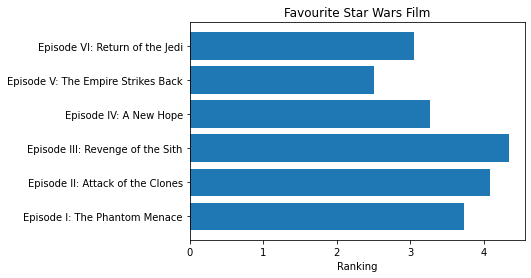

In [8]:
import matplotlib.pyplot as plt

film_labels = ['Episode I: The Phantom Menace', 
               'Episode II: Attack of the Clones',
               'Episode III: Revenge of the Sith', 
               'Episode IV: A New Hope', 
               'Episode V: The Empire Strikes Back', 
               'Episode VI: Return of the Jedi']

plt.barh(star_wars.columns[9:15], star_wars[star_wars.columns[9:15]].mean())

plt.title('Favourite Star Wars Film')
plt.xlabel('Ranking')
plt.yticks(ticks = np.arange(6), labels = film_labels)

plt.show()

`1` means the film was the most favorite while `6` means it was the least favorite. 

- It seems that the original trilogy consisting of **Episodes IV to VI are more popular**. 
- **`Episode V: The Empire Strikes Back` was the favourite film** amongst surveyed fans, with the lowest average ranking of 2.5.

Let's also find out if the best rated movie is also the most watched amongst fans. We can figure out how many people have seen each movie just by taking the sum of the `seen` columns.

In [9]:
print('Star Wars Episode: % of respondents who have seen the film')
print(star_wars[star_wars.columns[3:9]].sum() / len(star_wars) * 100)

Star Wars Episode: % of respondents who have seen the film
seen_1    56.745363
seen_2    48.145025
seen_3    46.374368
seen_4    51.180438
seen_5    63.912310
seen_6    62.225970
dtype: float64


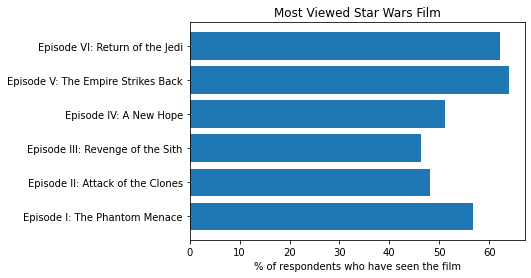

In [10]:
plt.barh(star_wars.columns[3:9], star_wars[star_wars.columns[3:9]].sum() / len(star_wars) * 100)

plt.title('Most Viewed Star Wars Film')
plt.xlabel('% of respondents who have seen the film')
plt.yticks(ticks = np.arange(6), labels = film_labels)

plt.show()

- The original trilogy of films (Episodes IV to VI) was seen by more respondents. 
- **`Episode V: The Empire Strikes Back` was the most viewed film** with 63.9% of respondents having watched it.

Hence, we have ascertained that `Episode V: The Empire Strikes Back` is the best film in the series, as it is the highest rated and most watched.

Now, let's examine whether the sentiment is the same amongst different segments of the survey population. There are several columns that segment our data into two groups. Here are a few examples:

| Column | Description |
| - | - |
| `Do you consider yourself to be a fan of the Star Wars film franchise?` | `True` or `False` |
| `Do you consider yourself to be a fan of the Star Trek franchise?` | `Yes` or `No` |
| `Gender` | `Male` or `Female` |

We will split the dataframe into subsets to determine the highest ranked film and most viewed film for each gender.

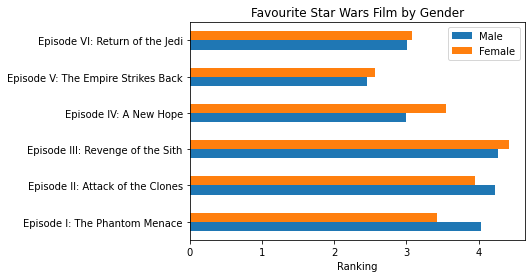

In [11]:
# Split the data by gender
males = star_wars[star_wars['Gender'] == 'Male']
females = star_wars[star_wars['Gender'] == 'Female']

# Compute mean ranking by gender
males_rank = males[males.columns[9:15]].mean()
females_rank = females[females.columns[9:15]].mean()

# Combine mean rankings into a dataframe
rank_by_gender = pd.concat([males_rank, females_rank], axis = 1)
rank_by_gender.columns = ['Male', 'Female']

# Plot bar graph of mean rankings for each gender
rank_by_gender.plot(kind = 'barh')

plt.title('Favourite Star Wars Film by Gender')
plt.xlabel('Ranking')
plt.yticks(ticks = np.arange(6), labels = film_labels)

plt.show()

- The responses from male and female groups are similar, with **`Episode V: The Empire Strikes Back` being rated as the favourite film for both genders.**
- However, we can see that the disparity in rankings between the original trilogy (Episodes IV to VI) and the prequel trilogy (Episodes I to III) is more significant for males.

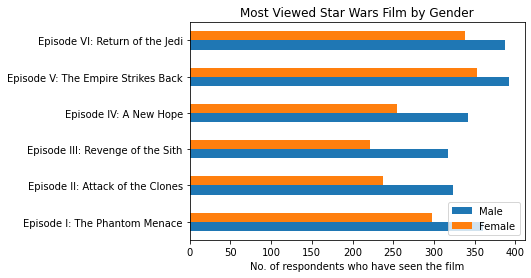

In [12]:
# Compute most seen by gender
males_seen = males[males.columns[3:9]].sum()
females_seen = females[females.columns[3:9]].sum()

# Combine most seen into a dataframe
seen_by_gender = pd.concat([males_seen, females_seen], axis = 1)
seen_by_gender.columns = ['Male', 'Female']

# Plot bar graph of most seen for each gender
seen_by_gender.plot(kind = 'barh')

plt.title('Most Viewed Star Wars Film by Gender')
plt.xlabel('No. of respondents who have seen the film')
plt.yticks(ticks = np.arange(6), labels = film_labels)

plt.show()

- Similarly, **`Episode V: The Empire Strikes Back` was the most viewed film by both male and female groups.**
- In addition, more males have viewed the prequel trilogy (Episodes I to III) as compared to females.

**b. Who are the most liked and disliked characters in the series?**

Next, we will compute the average ranking score for each Star Wars character, based on the responses to the question `Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.`:

In [13]:
print('Star Wars Character:    Average Ranking')
print(star_wars[star_wars.columns[15:29]].mean())

Star Wars Character:    Average Ranking
Han Solo                4.612786
Luke Skywalker          4.542720
Princess Leia Organa    4.509025
Anakin Skywalker        3.515188
Obi Wan Kenobi          4.560000
Emperor Palpatine       2.630221
Darth Vader             3.157385
Lando Calrissian        3.254878
Boba Fett               2.963054
C-3P0                   4.324063
R2 D2                   4.519277
Jar Jar Binks           2.304507
Padme Amidala           3.168305
Yoda                    4.578692
dtype: float64


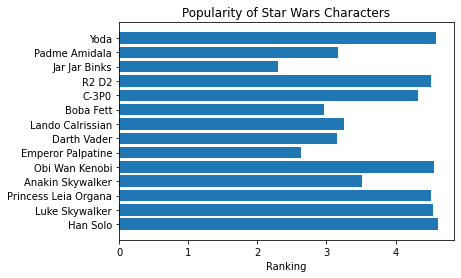

In [14]:
char_labels = ['Han Solo', 'Luke Skywalker', 'Princess Leia Organa', 'Anakin Skywalker',
               'Obi Wan Kenobi', 'Emperor Palpatine', 'Darth Vader', 'Lando Calrissian',
               'Boba Fett', 'C-3P0', 'R2 D2', 'Jar Jar Binks', 'Padme Amidala', 'Yoda']

plt.barh(star_wars.columns[15:29], star_wars[star_wars.columns[15:29]].mean())

plt.title('Popularity of Star Wars Characters')
plt.xlabel('Ranking')
plt.yticks(ticks = np.arange(14), labels = char_labels)

plt.show()

- We can see that `Han Solo`, `Luke Skywalker`, `Princess Leia Organa`, `Obi Wan Kenobi`, `R2 D2` and `Yoda` are all very popular characters with average ranking of above 4.5. **`Han Solo` is the most liked character by a narrow margin over `Yoda`**.
- **`Jar Jar Binks` and `Emperor Palpatine` are by far the least liked characters** with an average ranking of below 3.

Let's count the number of respondents who viewed each character very favorably (ranking of 5), to confirm whether `Han Solo` is the most liked character.

In [15]:
print('Star Wars Character:    % of respondents who viewed character very favorably')
print((star_wars[star_wars.columns[15:29]] == 5).sum() / len(star_wars) * 100)

Star Wars Character:    % of respondents who viewed character very favorably
Han Solo                51.433390
Luke Skywalker          46.543002
Princess Leia Organa    46.121417
Anakin Skywalker        20.657673
Obi Wan Kenobi          49.831366
Emperor Palpatine        9.274874
Darth Vader             26.138280
Lando Calrissian        11.973019
Boba Fett               11.635750
C-3P0                   39.966273
R2 D2                   47.386172
Jar Jar Binks            9.443508
Padme Amidala           14.165261
Yoda                    51.011804
dtype: float64


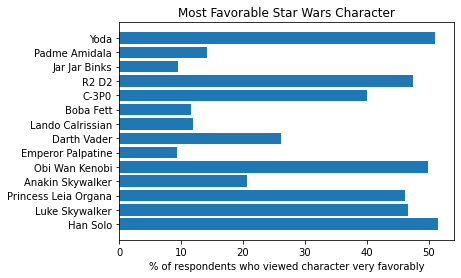

In [16]:
plt.barh(star_wars.columns[15:29], (star_wars[star_wars.columns[15:29]] == 5).sum() / len(star_wars) * 100)

plt.title('Most Favorable Star Wars Character')
plt.xlabel('% of respondents who viewed character very favorably')
plt.yticks(ticks = np.arange(14), labels = char_labels)

plt.show()

- **`Han Solo` is once again the most liked character** as 51.4% of surveyed fans viewed him very favorably, which is slightly more than 51.0% for `Yoda`.
- **`Jar Jar Binks` and `Emperor Palpatine` are the most disliked characters** with only around 9% of fans viewing them very favorably.

Lastly, we can also find out who is the most controversial character which divides opinion amongst the Star Wars fanbase. We will determine this by calculating the different between the number of likes and dislikes for each character.

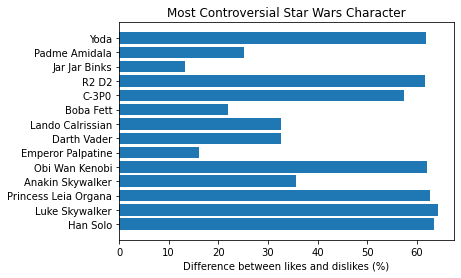

In [17]:
diff_likes_dislikes_list = []

for col in star_wars.columns[15:29]:
    value_counts_df = star_wars[col].value_counts()
    
    # % of very favorably or somewhat favorably responses
    likes = (value_counts_df.values[0] + value_counts_df.values[1]) / len(star_wars) * 100 
    
    # % of very unfavorably or somewhat unfavorably responses
    dislikes = (value_counts_df.values[-1] + value_counts_df.values[-2]) / len(star_wars) * 100
    
    diff_likes_dislikes_list.append([col, likes - dislikes])
    
diff_likes_dislikes_df = pd.DataFrame(diff_likes_dislikes_list, columns = ['Character', '% Difference'])

plt.barh(diff_likes_dislikes_df['Character'], diff_likes_dislikes_df['% Difference'])

plt.title('Most Controversial Star Wars Character')
plt.xlabel('Difference between likes and dislikes (%)')

plt.show()

- The most controversial characters are also the most disliked characters (`Jar Jar Binks` and `Emperor Palpatine`), with the difference between likes and dislikes only amounting to about 15% of the surveyed fans.
- The least controversial characters are the most popular characters (e.g. `Luke Skywalker`, `Han Solo`, `Yoda`) due to the higher number of likes and low number of dislikes.

---

## 4. Conclusion

**a. Which is the best film in the series?**

- The original trilogy (Episodes IV to VI) are more popular than the prequel trilogy (Episodes I to III).
- `Episode V: The Empire Strikes Back` was the most watched and highest ranked film amongst surveyed fans for both males and females

**b. Who are the most liked and disliked characters in the series?**

- `Han Solo` is the most liked character by a narrow margin over `Yoda`.
- `Jar Jar Binks` and `Emperor Palpatine` are by far the least liked and most controversial characters.